**Project 2 - Income Qualification**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Dataset :- train.csv and  test.csv
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape)
print(df_test.shape)
#print(df_train.dtypes)
#print(df_test.dtypes)

(9557, 143)
(23856, 142)


In [5]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [7]:
# check missing value/NULL in training data
df_train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [8]:
# check missing value/NULL in testing data
df_test.isnull().sum()

Id                     0
v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
                   ...  
SQBhogar_nin           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
agesq                  0
Length: 142, dtype: int64

In [10]:
# descriptive analysis
df_train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,...,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.100555,0.181647,0.017056,0.082243,0.102124,0.284608,0.975306,2.821492,0.587632,0.092707,0.062363,0.082767,0.093858,0.080674,0.714555,0.285445,34.303547,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,1.188852,0.692460,0.933052,1.206172,1.047559,1.440995,1.771202,1.772216,1.876428,4.730877,0.946550,1.772216,0.491107,0.267782,0.390756,0.092235,0.319788,0.113621,0.038248,0.038248,0.461361,0.416196,0.030675,0.032332,0.127120,0.248156,0.170391,0.131805,0.055942,0.046827,...,4.167694,0.341384,0.376140,0.405683,0.388653,0.316233,0.132568,0.123892,0.346790,0.123071,0.944507,0.819946,0.48578,0.300754,0.385573,0.129485,0.274750,0.302827,0.451251,0.155199,1.483249,0.492286,0.290036,0.241826,0.275543,0.291646,0.272348,0.451650,0.451650,21.612261,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000

In [12]:
# as we can see training dataset has very less number of rows/observation 
# than testing dataset.
# also testing dataset don't have the target column. 
# So the splitted data is not very impressive.
# we will create a new target column (same as training) in testing dataset
# and then append testing dataset after training dataset
 df_test['Target'] = np.nan
 #df_test.shape
 df_test.isnull().sum()

Id                     0
v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
                   ...  
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
agesq                  0
Target             23856
Length: 143, dtype: int64

In [15]:
# append testing dataset after training dataset
df_appended = df_train.append(df_test)
df_appended.shape
#df_appended.isnull().sum()
#df_appended.head()

(33413, 143)

In [54]:
# NULL value checking. Replace NULL/Nan with mean value
df_appended.fillna(df_appended.mean(),inplace = True)
df_appended.isnull().sum()
#df_appended.head()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 143, dtype: int64

In [25]:
# We will only consider some important columns as below :
#df_appended_new = df_appended[['idhogar','hacapo','v14a','rooms','v2a1','parentesco1','television','computer','v18q','refrig','tipovivi3','tipovivi2','tipovivi1','paredzocalo','paredblolad','cielorazo','Target']]
df_appended_new = df_appended[['idhogar','hacapo','v14a','rooms', \
                               'v2a1','parentesco1','television','computer', \
                               'v18q','refrig','tipovivi3','tipovivi2','tipovivi1', \
                               'paredzocalo','paredblolad','cielorazo','Target']]

# convert column "Target" to Integer (int64)
df_appended_new['Target'] = df_appended_new['Target'].astype(np.int64)
df_appended_new

,idhogar,hacapo,v14a,rooms,v2a1,parentesco1,television,computer,v18q,refrig,tipovivi3,tipovivi2,tipovivi1,paredzocalo,paredblolad,cielorazo,Target
0,21eb7fcc1,0,1,3,190000.000000,1,0,0,0,1,1,0,0,0,1,1,4
1,0e5d7a658,0,1,4,135000.000000,1,0,0,1,1,1,0,0,0,0,1,4
2,2c7317ea8,0,1,8,172030.845574,1,0,0,0,1,0,0,1,0,0,1,4
3,2b58d945f,0,1,5,180000.000000,0,0,0,1,1,1,0,0,0,1,1,4
4,2b58d945f,0,1,5,180000.000000,0,0,0,1,1,1,0,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,3aa78c56b,1,1,2,172030.845574,0,0,0,0,1,0,0,1,0,0,0,3
23852,d237404b6,0,1,3,172030.845574,1,0,0,0,1,0,0,1,0,0,0,3
23853,d237404b6,0,1,3,172030.845574,0,0,0,0,1,0,0,1,0,0,0,3
23854,d237404b6,0,1,3,172030.845574,0,0,0,0,1,0,0,1,0,0,0,3


In [28]:
# Check if there is a house without a family head.
# column :- #parentesco1, =1 if household head

df_appended_new_1 = df_appended_new
filter = df_appended_new_1['parentesco1'] != 1
df_appended_new_1 = df_appended_new_1[filter]
df_appended_new_1


,idhogar,hacapo,v14a,rooms,v2a1,parentesco1,television,computer,v18q,refrig,tipovivi3,tipovivi2,tipovivi1,paredzocalo,paredblolad,cielorazo,Target
3,2b58d945f,0,1,5,180000.000000,0,0,0,1,1,1,0,0,0,1,1,4
4,2b58d945f,0,1,5,180000.000000,0,0,0,1,1,1,0,0,0,1,1,4
6,2b58d945f,0,1,5,180000.000000,0,0,0,1,1,1,0,0,0,1,1,4
7,d6dae86b7,0,1,2,130000.000000,0,0,0,0,1,1,0,0,0,1,1,4
9,d6dae86b7,0,1,2,130000.000000,0,0,0,0,1,1,0,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23850,3aa78c56b,1,1,2,172030.845574,0,0,0,0,1,0,0,1,0,0,0,3
23851,3aa78c56b,1,1,2,172030.845574,0,0,0,0,1,0,0,1,0,0,0,3
23853,d237404b6,0,1,3,172030.845574,0,0,0,0,1,0,0,1,0,0,0,3
23854,d237404b6,0,1,3,172030.845574,0,0,0,0,1,0,0,1,0,0,0,3


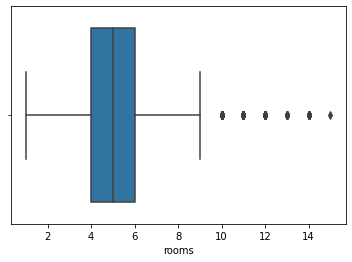

In [31]:
# check outliers of the feature/independent columns
#df_appended_new_filtered = df_appended_new[['hacapo','v14a','rooms','v2a1','refrig','v18q','television','computer','tipovivi3','tipovivi2','tipovivi1','cielorazo','paredzocalo','paredblolad','Target']]
df_appended_new_filtered = df_appended_new[['hacapo','v14a','rooms','v2a1', \
                                            'refrig','v18q','television', \
                                            'computer','tipovivi3','tipovivi2', \
                                            'tipovivi1','cielorazo','paredzocalo', \
                                            'paredblolad','Target']]

# here the boxplot of the column 'v2a1' don't give satisfied result,
# so we can ignore this.
# NOTE : also other than rooms, rest of the independent 
# columns having 0 or 1 value, so we can ignore them also.
#sns.boxplot(x=df_appended_new_filtered['v2a1'])
sns.boxplot(x=df_appended_new_filtered['rooms'])

In [0]:
# The above boxplot output shows the outliers where rooms > 9 , 
# so we can remove the outliers. 
# The outlier is something which is separate/different from the crowd. 

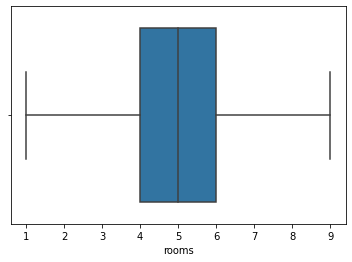

In [33]:
# remove outliers using filter the data where rooms <=9
filter = df_appended_new_filtered['rooms']<=9
df_appended_new_filtered = df_appended_new_filtered[filter]
df_appended_new_filtered
# now again check the outliers using boxplot
sns.boxplot(x=df_appended_new_filtered['rooms'])

The above output shows there is no outlier present in the dataset.

In [34]:
df_appended_new_filtered

,hacapo,v14a,rooms,v2a1,refrig,v18q,television,computer,tipovivi3,tipovivi2,tipovivi1,cielorazo,paredzocalo,paredblolad,Target
0,0,1,3,190000.000000,1,0,0,0,1,0,0,1,0,1,4
1,0,1,4,135000.000000,1,1,0,0,1,0,0,1,0,0,4
2,0,1,8,172030.845574,1,0,0,0,0,0,1,1,0,0,4
3,0,1,5,180000.000000,1,1,0,0,1,0,0,1,0,1,4
4,0,1,5,180000.000000,1,1,0,0,1,0,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,1,1,2,172030.845574,1,0,0,0,0,0,1,0,0,0,3
23852,0,1,3,172030.845574,1,0,0,0,0,0,1,0,0,0,3
23853,0,1,3,172030.845574,1,0,0,0,0,0,1,0,0,0,3
23854,0,1,3,172030.845574,1,0,0,0,0,0,1,0,0,0,3


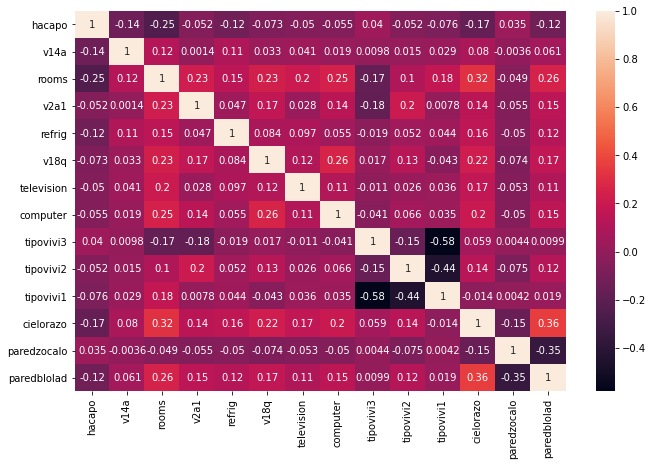

In [61]:
# Check coorelation using heatmap
# here just removed Target
#df_appended_new_filtered_1 = df_appended_new_filtered[['hacapo','v14a','rooms','v2a1','refrig','v18q','television','computer','tipovivi3','tipovivi2','tipovivi1','cielorazo','paredzocalo','paredblolad']]
df_appended_new_filtered_1 = df_appended_new_filtered[['hacapo','v14a', \
                                                       'rooms','v2a1', \
                                                       'refrig','v18q', \
                                                       'television','computer', \
                                                       'tipovivi3','tipovivi2', \
                                                       'tipovivi1','cielorazo', \
                                                       'paredzocalo','paredblolad']]

plt.figure(figsize = (11,7))
correlations = df_appended_new_filtered_1.corr()
sns.heatmap(data = correlations,annot=True)
plt.show()

The above output shows there has been moderate positive correlation between the below :
1. cielorazo(if the house has ceiling) &  
paredblolad(if predominant material on
the outside wall is block or brick)
2. rooms(number of all rooms in the house)
   &  
   computer(if the household has notebook
   or desktop computer)
3. v18q (owns a tablet)  & 
 computer(if the  household has 
 notebook or desktop computer)


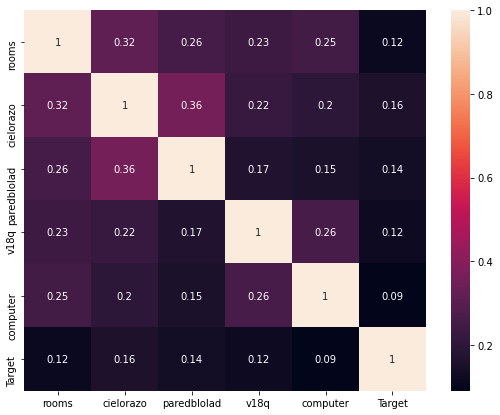

In [67]:
# Check coorelation using heatmap
# here just added Target and 
# taking only the above 5 variables(rooms,cielorazo,paredblolad,v18q,computer) from the above coorelation
#df_appended_new_filtered_1 = df_appended_new_filtered[['rooms','cielorazo','paredblolad','v18q','computer','Target']]
df_appended_new_filtered_1 = df_appended_new_filtered[['rooms','cielorazo', \
                                                       'paredblolad','v18q', \
                                                       'computer','Target']]

plt.figure(figsize = (9,7))
correlations = df_appended_new_filtered_1.corr()
sns.heatmap(data = correlations,annot=True)
plt.show()


The above output shows that Target (i.e. Poverty Level) mostly depends on the below :

cielorazo(if the house has ceiling) & 
paredblolad(if predominant material on the 
outside wall is block or brick)

In [0]:
# now split the data bewteen training and testing using 70:30 ratio
df_appended_new_filtered_1.head()
X = df_appended_new_filtered_1[['cielorazo','paredblolad']]
Y = df_appended_new_filtered_1['Target']
#X
#Y

In [69]:
# split the data in training and testing with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(23182, 2)
(9936, 2)
(23182,)
(9936,)


In [70]:
# Model Building - Apply Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_predict = rfc.predict(X_test)
accuracy = accuracy_score(Y_predict,Y_test)
print("Accuracy of Random Forest is: " , accuracy)

Accuracy of Random Forest is:  0.7466787439613527


In [71]:
# Split the dataset into traing and testing using 
# K-Fold Cross Validation Split
from sklearn.model_selection import KFold

#kf = KFold(n_splits = 5, shuffle=True)
kf = KFold(n_splits = 10, shuffle=True)

X = df_appended_new_filtered_1[['cielorazo','paredblolad']]
Y = df_appended_new_filtered_1['Target']

for train_index, test_index in kf.split(X,Y):
      #print("Train:", train_index, "Validation:",test_index)
      print("Train:", train_index, "Test:",test_index)
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
      

Train: [    0     1     2 ... 33115 33116 33117] Test: [   40    53    57 ... 33100 33108 33112]
Train: [    0     1     2 ... 33115 33116 33117] Test: [   14    19    45 ... 33093 33094 33103]
Train: [    0     1     2 ... 33114 33115 33117] Test: [    8    13    20 ... 33101 33110 33116]
Train: [    1     2     3 ... 33113 33115 33116] Test: [    0     6    25 ... 33107 33114 33117]
Train: [    0     1     2 ... 33115 33116 33117] Test: [    7    16    33 ... 33097 33099 33105]
Train: [    0     1     2 ... 33115 33116 33117] Test: [    3     9    12 ... 33084 33092 33113]
Train: [    0     1     2 ... 33115 33116 33117] Test: [    5    24    28 ... 33073 33078 33104]
Train: [    0     2     3 ... 33115 33116 33117] Test: [    1    17    23 ... 33102 33109 33111]
Train: [    0     1     3 ... 33114 33116 33117] Test: [    2    10    11 ... 33091 33098 33115]
Train: [    0     1     2 ... 33115 33116 33117] Test: [    4    31    46 ... 33060 33074 33076]


In [0]:
from sklearn.ensemble import RandomForestClassifier
#rf_class = RandomForestClassifier(n_estimators=10)
# n_estimators : Number of trees in random forest
#rfc = RandomForestClassifier(n_estimators=10)
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_predict = rfc.predict(X_test)

In [73]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(rfc, X, Y, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests with Cross Validation is: " , accuracy)

Accuracy of Random Forests with Cross Validation is:  74.94414023231009
